##### horizontal refine

In [1]:
import sys
sys.path.append("/home/bbb/Code/Galerkin-Differencing/")
from horiz_classes import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from linear_basis.mac_grid.helpers import gauss
# %matplotlib widget

In [2]:
def rowprint(m,ind,sys,U):
    first = True
    print((sys.mesh.dofs[ind].x,sys.mesh.dofs[ind].y),sys.mesh.dofs[ind].h,U[ind],sep='\t')
    for j,v in enumerate(m[ind]):
        if abs(v)<1e-12:
            if first:
                print()
                first=False
            else:
                pass
        else:
            x,y = sys.mesh.dofs[j].x,sys.mesh.dofs[j].y
            print(j,v,(x,y),sys.mesh.dofs[j].h,U[j],sep='\t')
            first=True
def matvis(m):
    vism = m.copy()
    vism[vism == 0] = np.nan
    plt.matshow(vism)
    plt.show()

## mass

#### constant test

In [3]:
N = 4
u = lambda x,y: 1
href = HorizontalRefineSolver(N,u)

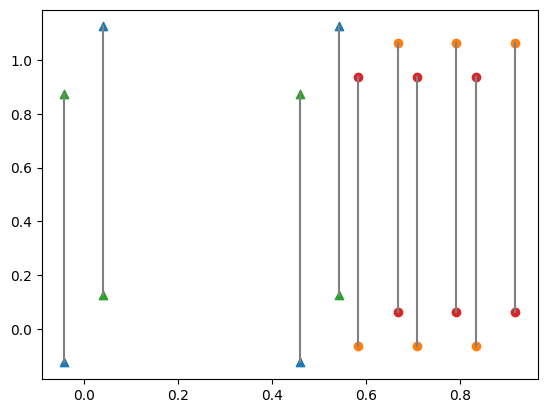

In [4]:
href.vis_periodic()

In [5]:
href.projection()

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [6]:
np.linalg.eig(href.C.T@href.M@href.C)[0]

array([0.04142858, 0.04140595, 0.02406616, 0.02399372, 0.02248221,
       0.02244291, 0.01891564, 0.01360429, 0.01314654, 0.01264729,
       0.01120901, 0.01077581, 0.00237984, 0.01010152, 0.00940179,
       0.00937638, 0.00904295, 0.00894959, 0.00300998, 0.0033613 ,
       0.00368132, 0.00744149, 0.00702442, 0.00703934, 0.00597622,
       0.00630388, 0.00619705, 0.00519231, 0.00465562, 0.00472124,
       0.00481683, 0.00498314])

In [7]:
np.array(href.mesh.periodic[0]).reshape((4,-1))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [12, 13, 14],
       [15, 16, 17]])

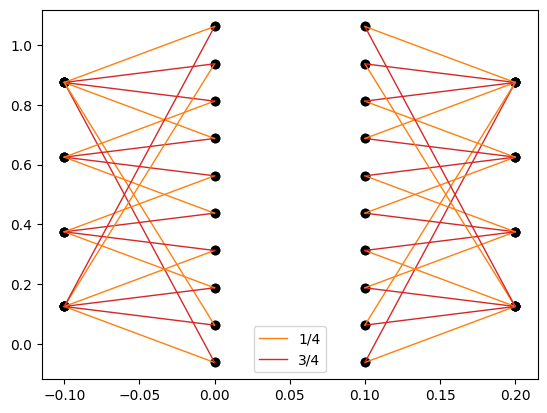

In [8]:
fig = href.vis_constraints()

In [9]:
href.error(proj=True)

2.357930318304291e-16

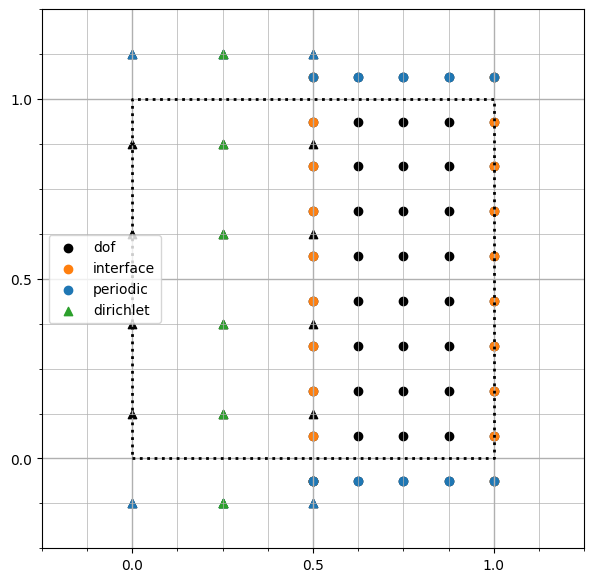

In [10]:
href.vis_mesh()

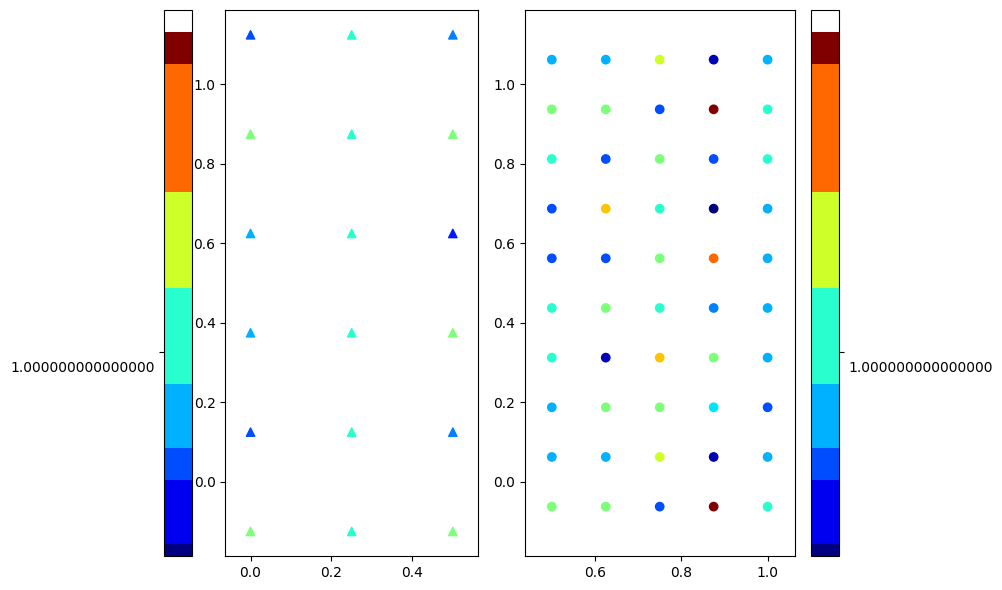

In [11]:
href.vis_dof_sol(proj=True)

In [12]:
N = 2
u = lambda x,y: x**2+y**2
href = HorizontalRefineSolver(N,u)

In [13]:
href.projection()

array([0.6365363 , 0.56718507, 1.26570955, 0.73467809, 1.39107426,
       1.58119664])

In [ ]:
er0 = href.error(proj=True)
er0, er0/4

In [ ]:
N = 4
href = HorizontalRefineSolver(N,u)
href.projection()
er1 = href.error(proj=True)
er1, er1/4

In [ ]:
N = 8
href = HorizontalRefineSolver(N,u)
href.projection()
er2 = href.error(proj=True)
er2, er2/4

#### convergence

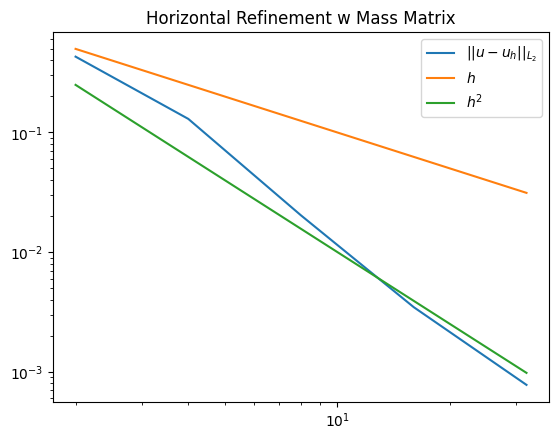

In [14]:
u = lambda x,y: np.sin(2*np.pi*x)*np.cos(2*np.pi*y)

errs = []
Ns = np.array([2,4,8,16,32])
for N in Ns:
    href = HorizontalRefineSolver(N,u)
    href.projection()
    err = href.error(proj=True)
    errs.append(err)

plt.loglog(Ns,errs,label=r'$||u-u_h||_{L_2}$')
plt.loglog(Ns,1/Ns,label=r'$h$')
plt.loglog(Ns,1/Ns**2,label=r'$h^2$')
plt.legend()
plt.title('Horizontal Refinement w Mass Matrix')
plt.savefig('href_mass_conv.png',dpi=300)
plt.show()

## laplace

#### constant test

In [15]:
N = 4
u = lambda x,y: 1
f = lambda x,y: 0
href = HorizontalRefineSolver(N,u,f)

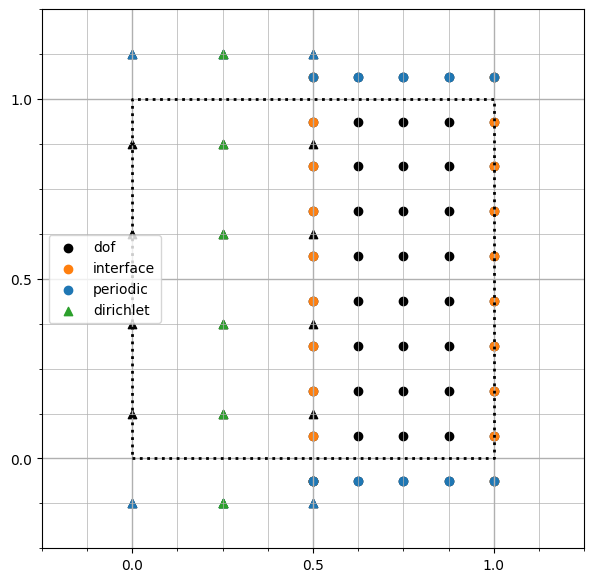

In [16]:
href.vis_mesh()

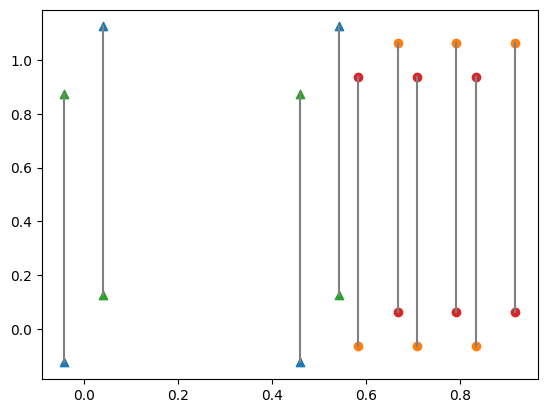

In [17]:
href.vis_periodic()

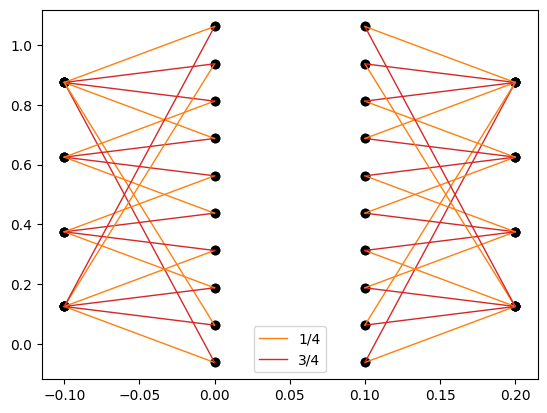

In [18]:
fig=href.vis_constraints()

In [19]:
href.laplace()

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [20]:
np.linalg.eig(href.C.T@href.K@href.C)[0]

array([5.73515256, 0.22229148, 5.1353769 , 5.14291216, 0.88398562,
       0.92832163, 1.10449255, 4.73291319, 4.49829011, 1.64468807,
       1.77496761, 4.15836958, 4.00608469, 3.92737026, 3.67942064,
       3.6503304 , 2.23982396, 3.60497046, 2.33353226, 2.59696087,
       2.48397553, 2.48863626, 3.34048649, 3.25951407, 3.20821781,
       3.19019465, 2.82388099, 3.04903956, 2.98584666, 2.8865213 ,
       2.94487816, 2.92188687])

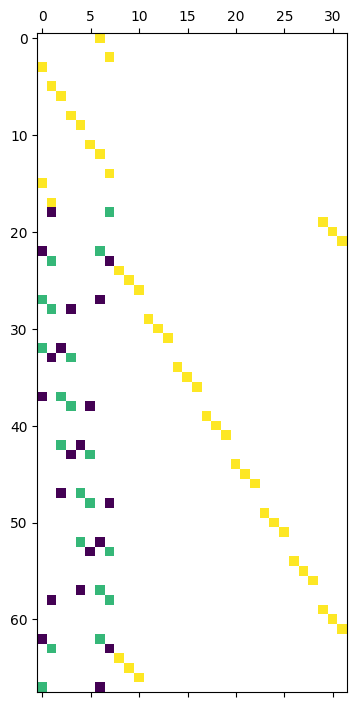

In [21]:
matvis(href.C)

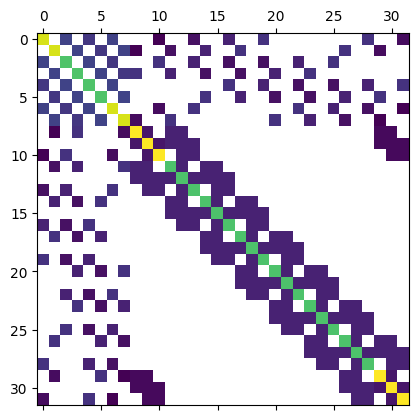

In [22]:
matvis(href.C.T@href.K@href.C)

In [23]:
href.error()

1.79117173460843e-15

In [24]:
N = 4
u = lambda x,y: x
f = lambda x,y: 0
href = HorizontalRefineSolver(N,u,f)

In [25]:
href.laplace()
href.error()

0.40665044366548164

In [ ]:
href.vis_dof_sol(err=True)

In [ ]:
href.

In [ ]:
fig = href.vis_constraints()

In [ ]:
href.vis_mesh()

In [ ]:
# for n = 8

rowprint(href.K,6,href,href.U_lap)
print()
rowprint(href.K,9,href,href.U_lap)
print()
rowprint(href.K,24,href,href.U_lap)
print()
rowprint(href.K,21,href,href.U_lap)

In [ ]:
# for n = 8

rowprint(href.K,63,href,href.U_lap)
print()
rowprint(href.K,59,href,href.U_lap)
print()
print(href.C_full[59])
print()
rowprint(href.K,122,href,href.U_lap)
print()
rowprint(href.K,126,href,href.U_lap)

In [ ]:
N = 2
u = lambda x,y: x**2+y**2
href = HorizontalRefineSolver(N,u)

In [ ]:
href.projection()

In [ ]:
er0 = href.error(proj=True)
er0, er0/4

In [ ]:
N = 4
href = HorizontalRefineSolver(N,u)
href.projection()
er1 = href.error(proj=True)
er1, er1/4

In [ ]:
N = 8
href = HorizontalRefineSolver(N,u)
href.projection()
er2 = href.error(proj=True)
er2, er2/4

#### convergence

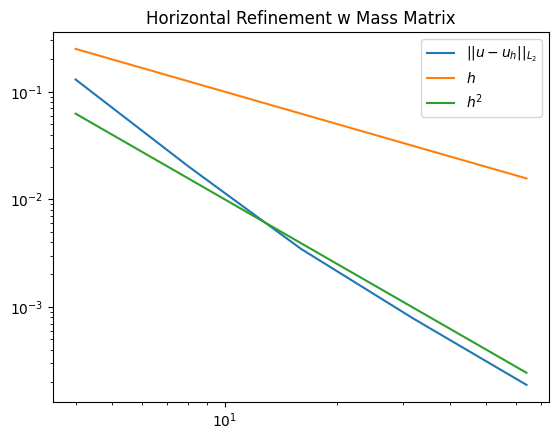

In [26]:
u = lambda x,y: np.sin(2*np.pi*x)*np.cos(2*np.pi*y)
f = lambda x,y: 8*np.pi**2*np.sin(2*np.pi*x)*np.cos(2*np.pi*y)

errs = []
Ns = np.array([4,8,16,32,64])
for N in Ns:
    href = HorizontalRefineSolver(N,u)
    href.projection()
    err = href.error(proj=True)
    errs.append(err)

plt.loglog(Ns,errs,label=r'$||u-u_h||_{L_2}$')
plt.loglog(Ns,1/Ns,label=r'$h$')
plt.loglog(Ns,1/Ns**2,label=r'$h^2$')
plt.legend()
plt.title('Horizontal Refinement w Mass Matrix')
plt.savefig('href_mass_conv.png',dpi=300)
plt.show()

In [ ]:
dof_vis = href.vis_dofs()

In [ ]:
dof_vis

In [ ]:
el_vis = href.vis_elements()

In [ ]:
el_vis

In [ ]:
lap.mesh.boundaries